In [25]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential


train data 확인

In [26]:
dfTrain = pd.read_csv('./labelsCsv/trainLabels.csv')
dfTrain

Unnamed: 0   bBoxW   bBoxH  bBoxX  width  height  categoryId  bBoxY  \
0              0  4000.0  2252.0    0.0   4000    2252       20813    0.0   
1              1  4000.0  2252.0    0.0   4000    2252       20813    0.0   
2              2  4000.0  2252.0    0.0   4000    2252       20813    0.0   
3              3  4000.0  2252.0    0.0   4000    2252       20813    0.0   
4              4  4000.0  2252.0    0.0   4000    2252       20813    0.0   
...          ...     ...     ...    ...    ...     ...         ...    ...   
5590        5590  4608.0  2592.0    0.0   4608    2592       20595    0.0   
5591        5591  4608.0  2592.0    0.0   4608    2592       20595    0.0   
5592        5592  4608.0  2592.0    0.0   4608    2592       20595    0.0   
5593        5593  4608.0  2592.0    0.0   4608    2592       20595    0.0   
5594        5594  4608.0  2592.0    0.0   4608    2592       20595    0.0   

                        fileName categoryName  
0        검멀레동굴 _066_42469394.jpg        검멀레동굴  
1        검멀레동굴 _067_42469395.jpg        검멀레동굴  
2        검멀레동굴 _068_42469396.jpg        검멀레동굴  
3        검멀레동굴 _104_42469397.jpg        검멀레동굴  
4        검멀레동굴 _106_42469399.jpg        검멀레동굴  
...                          ...          ...  
5590  휴애리자연생활공원_335_39296063.jpg    휴애리자연생활공원  
5591  휴애리자연생활공원_338_39296069.jpg    휴애리자연생활공원  
5592  휴애리자연생활공원_339_39296074.jpg    휴애리자연생활공원  
5593  휴애리자연생활공원_340_39296075.jpg    휴애리자연생활공원  
5594  휴애리자연생활공원_343_39296082.jpg    휴애리자연생활공원  

[5595 rows x 10 columns]

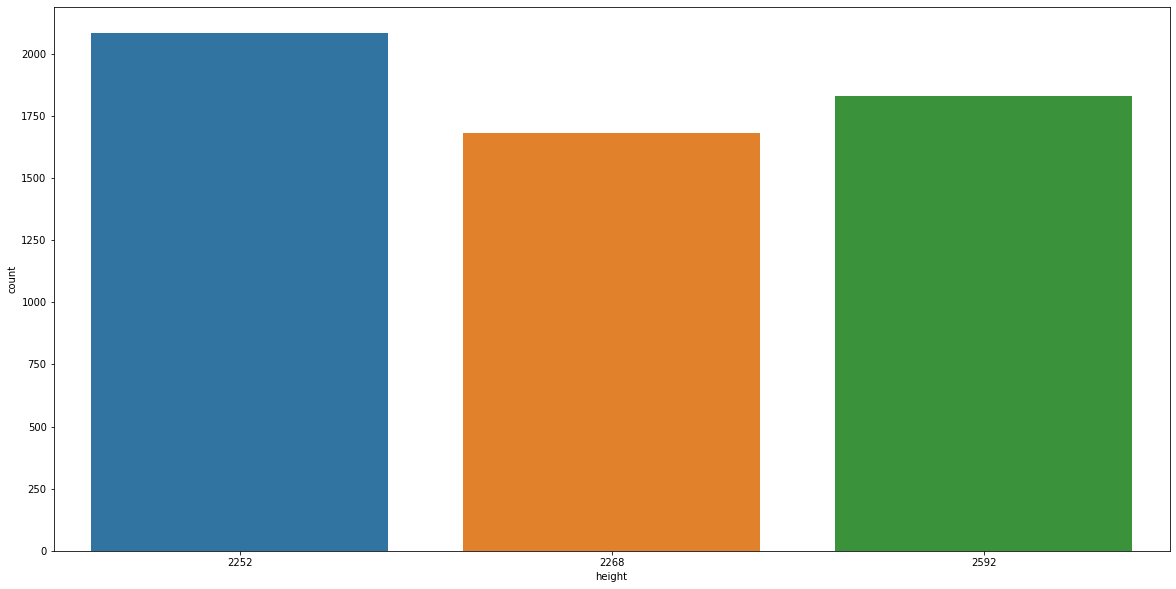

In [27]:
import seaborn as sns

plt.figure(figsize=(20, 10))
ax = sns.countplot(x="height", data=dfTrain)

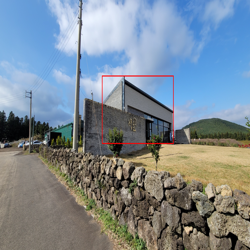

In [28]:
from PIL import Image
from PIL import ImageDraw

imgSample = Image.open('./dataSet/images/'+dfTrain['categoryName'][1234]+'/'+dfTrain['fileName'][1234])

draw = ImageDraw.Draw(imgSample)
draw.rectangle([dfTrain['bBoxX'][1234], dfTrain['bBoxY'][1234], dfTrain['bBoxW'][1234], dfTrain['bBoxH'][1234]], outline="red", width=9)
imgSampleResized = imgSample.resize((250, 250))
imgSampleResized

test data 확인

In [29]:
dfTest = pd.read_csv('./labelsCsv/testLabels.csv')
dfTest

Unnamed: 0   bBoxW   bBoxH  bBoxX  width  height  categoryId  bBoxY  \
0             0  4000.0  2252.0    0.0   4000    2252       20813    0.0   
1             1  4000.0  2252.0    0.0   4000    2252       20813    0.0   
2             2  4000.0  2252.0    0.0   4000    2252       20813    0.0   
3             3  4000.0  2252.0    0.0   4000    2252       20813    0.0   
4             4  4000.0  2252.0    0.0   4000    2252       20813    0.0   
..          ...     ...     ...    ...    ...     ...         ...    ...   
735         735  4608.0  2592.0    0.0   4608    2592       20595    0.0   
736         736  4608.0  2592.0    0.0   4608    2592       20595    0.0   
737         737  4608.0  2592.0    0.0   4608    2592       20595    0.0   
738         738  4608.0  2592.0    0.0   4608    2592       20595    0.0   
739         739  4608.0  2592.0    0.0   4608    2592       20595    0.0   

                       fileName categoryName  
0       검멀레동굴 _117_42469410.jpg        검멀레동굴  
1       검멀레동굴 _128_42469421.jpg        검멀레동굴  
2       검멀레동굴 _143_42469436.jpg        검멀레동굴  
3       검멀레동굴 _153_42469446.jpg        검멀레동굴  
4       검멀레동굴 _179_42469472.jpg        검멀레동굴  
..                          ...          ...  
735  휴애리자연생활공원_313_39296015.jpg    휴애리자연생활공원  
736  휴애리자연생활공원_328_39296042.jpg    휴애리자연생활공원  
737  휴애리자연생활공원_331_39296053.jpg    휴애리자연생활공원  
738  휴애리자연생활공원_341_39296080.jpg    휴애리자연생활공원  
739  휴애리자연생활공원_344_39296085.jpg    휴애리자연생활공원  

[740 rows x 10 columns]

In [30]:
dfVal = pd.read_csv('./labelsCsv/valLabels.csv')
dfVal

Unnamed: 0   bBoxW   bBoxH  bBoxX  width  height  categoryId  bBoxY  \
0             0  4000.0  2252.0    0.0   4000    2252       20813    0.0   
1             1  4000.0  2252.0    0.0   4000    2252       20813    0.0   
2             2  4000.0  2252.0    0.0   4000    2252       20813    0.0   
3             3  4000.0  2252.0    0.0   4000    2252       20813    0.0   
4             4  4000.0  2252.0    0.0   4000    2252       20813    0.0   
..          ...     ...     ...    ...    ...     ...         ...    ...   
674         674  4608.0  2592.0    0.0   4608    2592       20595    0.0   
675         675  4608.0  2592.0    0.0   4608    2592       20595    0.0   
676         676  4608.0  2592.0    0.0   4608    2592       20595    0.0   
677         677  4608.0  2592.0    0.0   4608    2592       20595    0.0   
678         678  4608.0  2592.0    0.0   4608    2592       20595    0.0   

                       fileName categoryName  
0       검멀레동굴 _105_42469398.jpg        검멀레동굴  
1       검멀레동굴 _131_42469424.jpg        검멀레동굴  
2       검멀레동굴 _134_42469427.jpg        검멀레동굴  
3       검멀레동굴 _144_42469437.jpg        검멀레동굴  
4       검멀레동굴 _164_42469457.jpg        검멀레동굴  
..                          ...          ...  
674  휴애리자연생활공원_253_39295900.jpg    휴애리자연생활공원  
675  휴애리자연생활공원_285_39295963.jpg    휴애리자연생활공원  
676  휴애리자연생활공원_304_39295997.jpg    휴애리자연생활공원  
677  휴애리자연생활공원_308_39296008.jpg    휴애리자연생활공원  
678  휴애리자연생활공원_317_39296023.jpg    휴애리자연생활공원  

[679 rows x 10 columns]

In [31]:
categoryName = list(dfTrain['categoryName'].unique())

dfTrain['categoryNumber'] = 0
dfTest['categoryNumber'] = 0
dfVal['categoryNumber'] = 0

for i in dfTrain.index:
  dfTrain['categoryNumber'][i] = categoryName.index(dfTrain['categoryName'][i])

for i in dfTest.index:
  dfTest['categoryNumber'][i] = categoryName.index(dfTest['categoryName'][i])

for i in dfVal.index:
  dfVal['categoryNumber'][i] = categoryName.index(dfVal['categoryName'][i])

dfVal

C:\Users\nhs04\AppData\Local\Temp\ipykernel_8892\3968150172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['categoryNumber'][i] = categoryName.index(dfTrain['categoryName'][i])
C:\Users\nhs04\AppData\Local\Temp\ipykernel_8892\3968150172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['categoryNumber'][i] = categoryName.index(dfTest['categoryName'][i])
C:\Users\nhs04\AppData\Local\Temp\ipykernel_8892\3968150172.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

Unnamed: 0   bBoxW   bBoxH  bBoxX  width  height  categoryId  bBoxY  \
0             0  4000.0  2252.0    0.0   4000    2252       20813    0.0   
1             1  4000.0  2252.0    0.0   4000    2252       20813    0.0   
2             2  4000.0  2252.0    0.0   4000    2252       20813    0.0   
3             3  4000.0  2252.0    0.0   4000    2252       20813    0.0   
4             4  4000.0  2252.0    0.0   4000    2252       20813    0.0   
..          ...     ...     ...    ...    ...     ...         ...    ...   
674         674  4608.0  2592.0    0.0   4608    2592       20595    0.0   
675         675  4608.0  2592.0    0.0   4608    2592       20595    0.0   
676         676  4608.0  2592.0    0.0   4608    2592       20595    0.0   
677         677  4608.0  2592.0    0.0   4608    2592       20595    0.0   
678         678  4608.0  2592.0    0.0   4608    2592       20595    0.0   

                       fileName categoryName  categoryNumber  
0       검멀레동굴 _105_42469398.jpg        검멀레동굴               0  
1       검멀레동굴 _131_42469424.jpg        검멀레동굴               0  
2       검멀레동굴 _134_42469427.jpg        검멀레동굴               0  
3       검멀레동굴 _144_42469437.jpg        검멀레동굴               0  
4       검멀레동굴 _164_42469457.jpg        검멀레동굴               0  
..                          ...          ...             ...  
674  휴애리자연생활공원_253_39295900.jpg    휴애리자연생활공원              43  
675  휴애리자연생활공원_285_39295963.jpg    휴애리자연생활공원              43  
676  휴애리자연생활공원_304_39295997.jpg    휴애리자연생활공원              43  
677  휴애리자연생활공원_308_39296008.jpg    휴애리자연생활공원              43  
678  휴애리자연생활공원_317_39296023.jpg    휴애리자연생활공원              43  

[679 rows x 11 columns]

이미지 읽기

In [32]:
imageHeight = 250
imageWidth = 250
imageChannel = 3

trainImages = []
trainLabels = []

for i in tqdm(range(len(dfTrain))):
    img = load_img('./dataSet/images/'+dfTrain['categoryName'][i]+'/'+dfTrain['fileName'][i],
                     target_size = (imageHeight, imageWidth))
    img = img_to_array(img)
    trainImages.append(img)

100%|██████████| 5595/5595 [06:23<00:00, 14.58it/s]


In [33]:
testImages = []
testLabels = []

for i in tqdm(range(len(dfTest))):
    img = load_img('./dataSet/images/'+dfTest['categoryName'][i]+'/'+dfTest['fileName'][i],
                     target_size = (imageHeight, imageWidth))
    img = img_to_array(img)
    testImages.append(img)

100%|██████████| 740/740 [00:51<00:00, 14.40it/s]


In [34]:
valImages = []
valLabels = []

for i in tqdm(range(len(dfVal))):
    img = load_img('./dataSet/images/'+dfVal['categoryName'][i]+'/'+dfVal['fileName'][i],
                     target_size = (imageHeight, imageWidth))
    img = img_to_array(img)
    valImages.append(img)

100%|██████████| 679/679 [00:48<00:00, 13.99it/s]


In [35]:
trainLabels = dfTrain['categoryNumber'].values
trainLabels

array([ 0,  0,  0, ..., 43, 43, 43], dtype=int64)

In [36]:
testLabels = dfTest['categoryNumber'].values
testLabels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14

In [37]:
valLabels = dfVal['categoryNumber'].values
valLabels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16,
       16, 16, 16, 16, 16

In [38]:
len(dfTest['categoryNumber'].unique())

44

In [39]:
x_train = np.array(trainImages)
y_train = np.array(trainLabels)

x_test = np.array(testImages)
y_test = np.array(testLabels)

x_val = np.array(valImages)
y_val = np.array(valLabels)

ValueError: Data cardinality is ambiguous:
  x sizes: 679
  y sizes: 0
Make sure all arrays contain the same number of samples

오류 확인 -> 해결

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(5595, 250, 250, 3)
(5595,)
(740, 250, 250, 3)
(740,)
(679, 250, 250, 3)
(679,)


In [41]:
x_train, x_test, x_val = x_train/255.0, x_test/255.0, x_val/255.0

In [42]:
x_train, x_test, x_val

(array([[[[0.8509804 , 0.8627451 , 0.8980392 ],
          [0.84705883, 0.85882354, 0.89411765],
          [0.8509804 , 0.8627451 , 0.8980392 ],
          ...,
          [0.85490197, 0.8666667 , 0.89411765],
          [0.85490197, 0.8666667 , 0.89411765],
          [0.85490197, 0.8666667 , 0.89411765]],
 
         [[0.84313726, 0.85490197, 0.8901961 ],
          [0.84705883, 0.85882354, 0.89411765],
          [0.84313726, 0.85882354, 0.89411765],
          ...,
          [0.85490197, 0.8666667 , 0.89411765],
          [0.85490197, 0.8666667 , 0.89411765],
          [0.8509804 , 0.8627451 , 0.8901961 ]],
 
         [[0.84705883, 0.85882354, 0.89411765],
          [0.84705883, 0.85882354, 0.8862745 ],
          [0.84705883, 0.85882354, 0.89411765],
          ...,
          [0.85490197, 0.8666667 , 0.89411765],
          [0.8509804 , 0.8627451 , 0.8901961 ],
          [0.8509804 , 0.8627451 , 0.8901961 ]],
 
         ...,
 
         [[0.52156866, 0.56078434, 0.59607846],
          [0.50196

cnn 모델 설정

In [43]:
model = Sequential([    
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(imageHeight, imageWidth, imageChannel)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(44, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 124, 124, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 61, 61, 64)       

모델 컴파일

In [44]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [45]:
# 처음 만든 모델이라면 EPOCHS를 1~5개로 하여 잘 돌아가는지 성능을 확인해보고 값을 증가 시켜 봅시다. 
EPOCHS = 5

# EPOCHS에 따른 성능을 보기 위하여 history 사용
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_val, y_val), # validation 데이터 사용
                    epochs=EPOCHS, 
                   )

Epoch 1/5
175/175 [==============================] - 413s 2s/step - loss: 3.6531 - accuracy: 0.1567 - val_loss: 1.9953 - val_accuracy: 0.5346
Epoch 2/5
175/175 [==============================] - 385s 2s/step - loss: 1.6516 - accuracy: 0.5221 - val_loss: 0.9320 - val_accuracy: 0.7835
Epoch 3/5
175/175 [==============================] - 424s 2s/step - loss: 1.0334 - accuracy: 0.6811 - val_loss: 0.6037 - val_accuracy: 0.8424
Epoch 4/5
175/175 [==============================] - 407s 2s/step - loss: 0.7140 - accuracy: 0.7757 - val_loss: 0.3674 - val_accuracy: 0.9116
Epoch 5/5
175/175 [==============================] - 402s 2s/step - loss: 0.6267 - accuracy: 0.7966 - val_loss: 0.3425 - val_accuracy: 0.9175


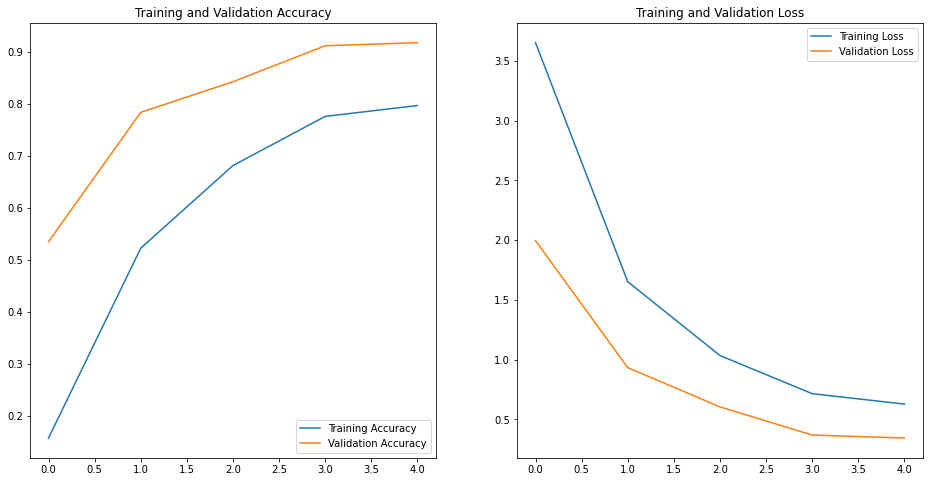

In [46]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("test_loss:", test_loss, "test_acc:", test_acc)

NameError: name 'test_acc' is not defined

In [48]:
test_prediction = np.argmax(model.predict(x_test), axis=-1)

24/24 [==============================] - 10s 392ms/step


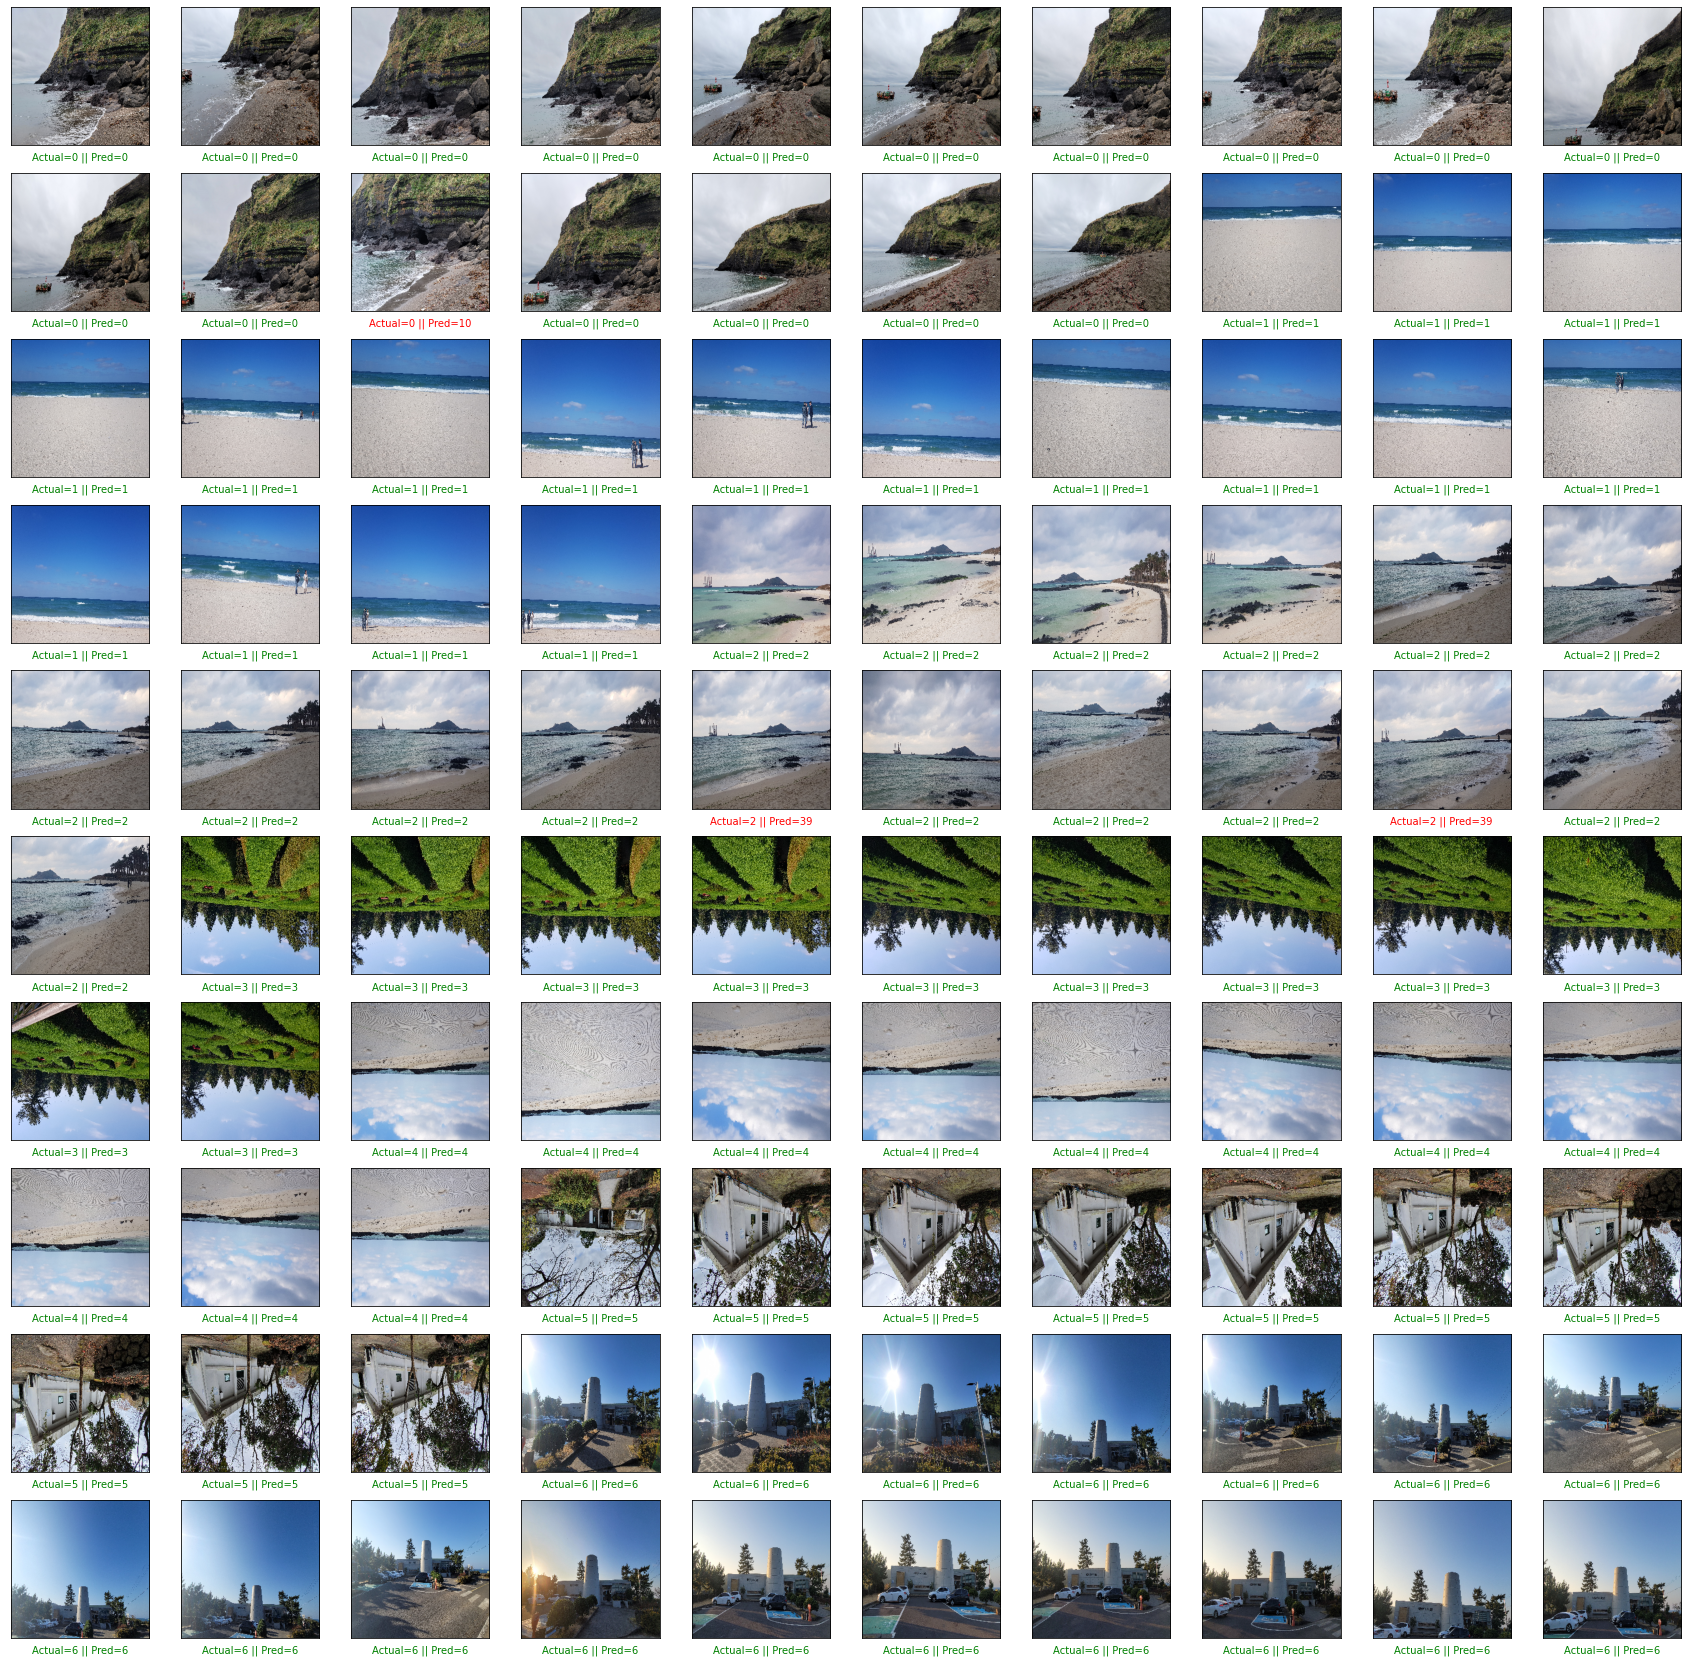

In [51]:
plt.figure(figsize = (30, 30))

start_index = 0
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = test_prediction[start_index + i]
    actual = y_test[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(array_to_img(x_test[start_index + i]))
plt.show()

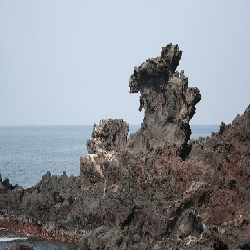

In [76]:
testImage = load_img("./testImage.jpg", target_size = (imageHeight, imageWidth))
testImage

In [77]:
testImage = np.array(testImage)
testImage = testImage/255.0

print(testImage)

[[[0.74117647 0.79215686 0.85490196]
  [0.74117647 0.79215686 0.85490196]
  [0.74901961 0.8        0.8627451 ]
  ...
  [0.74117647 0.79215686 0.85882353]
  [0.74509804 0.79607843 0.8627451 ]
  [0.74509804 0.79607843 0.8627451 ]]

 [[0.74901961 0.8        0.8627451 ]
  [0.74901961 0.8        0.8627451 ]
  [0.75686275 0.80784314 0.87058824]
  ...
  [0.74509804 0.79607843 0.8627451 ]
  [0.74509804 0.79607843 0.8627451 ]
  [0.74117647 0.79215686 0.85882353]]

 [[0.74901961 0.8        0.8627451 ]
  [0.74901961 0.8        0.8627451 ]
  [0.75294118 0.80392157 0.86666667]
  ...
  [0.74509804 0.79607843 0.8627451 ]
  [0.74509804 0.79607843 0.8627451 ]
  [0.74117647 0.79215686 0.85882353]]

 ...

 [[0.42352941 0.45882353 0.48627451]
  [0.28627451 0.32156863 0.34901961]
  [0.41176471 0.43921569 0.47058824]
  ...
  [0.04313725 0.04313725 0.03529412]
  [0.03529412 0.01960784 0.02352941]
  [0.04705882 0.03137255 0.03529412]]

 [[0.46666667 0.50588235 0.54117647]
  [0.38039216 0.41960784 0.45490196]


In [78]:
confidence = model.predict(testImage.reshape((1, imageHeight, imageWidth, imageChannel)))

1/1 [==============================] - 0s 40ms/step


In [79]:
for i in range(confidence.shape[1]):
    print(f"{i} 일 확률 = {confidence[0][i]}")

print(f"정답은 : {np.argmax(confidence, axis=1)}")

0 일 확률 = 0.20732833445072174
1 일 확률 = 0.00014248851221054792
2 일 확률 = 0.0025823921896517277
3 일 확률 = 3.000214519488509e-06
4 일 확률 = 1.151163473878114e-06
5 일 확률 = 0.0005444766720756888
6 일 확률 = 0.23118454217910767
7 일 확률 = 0.004585570190101862
8 일 확률 = 0.0002455225621815771
9 일 확률 = 0.0007493415614590049
10 일 확률 = 0.0006887837080284953
11 일 확률 = 0.073391392827034
12 일 확률 = 6.979527370276628e-06
13 일 확률 = 0.0002601607411634177
14 일 확률 = 3.3816579616541276e-06
15 일 확률 = 2.841694595190347e-06
16 일 확률 = 0.00020075577776879072
17 일 확률 = 0.00020617380505427718
18 일 확률 = 0.02181415818631649
19 일 확률 = 0.022238871082663536
20 일 확률 = 0.0027394474018365145
21 일 확률 = 0.0261191725730896
22 일 확률 = 4.939424798067193e-07
23 일 확률 = 0.0006365565350279212
24 일 확률 = 0.00011544101289473474
25 일 확률 = 0.005343456752598286
26 일 확률 = 0.002129896776750684
27 일 확률 = 5.5256268751691096e-06
28 일 확률 = 0.036745958030223846
29 일 확률 = 0.0016121253138408065
30 일 확률 = 0.0012613902799785137
31 일 확률 = 0.000189560261787846

In [80]:
dfTrain['categoryName'].unique()[np.argmax(confidence, axis=1)]

array(['함덕해수욕장'], dtype=object)